In [1]:
%matplotlib inline
import os, shutil
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image, display, HTML
plt.style.use('seaborn')
plt.style.use('jpg')

from astropy import units as u
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(70, 0.3)
from toolbox.astro import angsep

import hhana
from proj_utils import *
footprints = {r:hhana.Footprint(r) for r in range(1,7)}

In [2]:
image_dir = '../udg-zoo/io/images/'
def display_candy(num, size=300):
    display(Image(filename=image_dir+'candy-'+str(num)+'.png', height=size, width=size))

In [3]:
sample = get_sample()
nsa = get_nsa(5e10)
yang = get_yang(12.5, 0.002, 0.05)

In [4]:
yang_idx, sep, _ = sample.skycoord.match_to_catalog_sky(yang.skycoord)
yang_idx_Mpc, yang_sep_Mpc = find_nearest_in_Mpc(sample, yang, cosmo)
nsa_idx, sep, _ = sample.skycoord.match_to_catalog_sky(nsa.skycoord)
nsa_idx_Mpc, nsa_sep_Mpc = find_nearest_in_Mpc(sample, nsa, cosmo)

# Find the nearest NSA galaxies to candidates (assuming same $z$)
- Note that some candidates are assigned the same NSA galaxy 

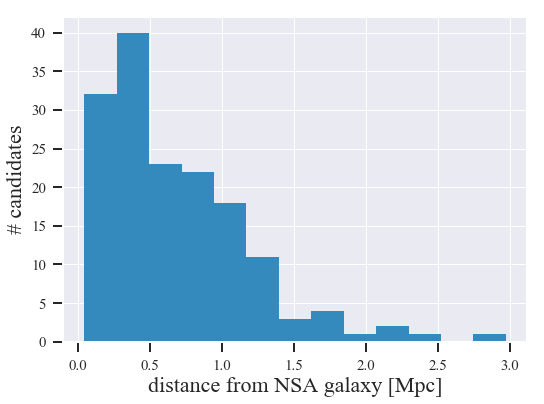

In [5]:
plt.hist(nsa_sep_Mpc, bins='auto')
plt.xlabel('distance from NSA galaxy [Mpc]')
plt.ylabel('# candidates');

In [6]:
def plot_region(region, xlim=[None, None], ylim=[None, None], figsize=(15,7), ref_cat='nsa'):
    cut = sample['region']==region 
    kws = dict(c=sample[cut]['g-i'], cmap='bwr', vmin=0.7, vmax=0.71, marker='^')
    ref = nsa[nsa_idx_Mpc][cut].copy() if ref_cat=='nsa' else yang[yang_idx_Mpc][cut].copy()
    ref['theta'] = (180./np.pi)*1.0*u.Mpc/cosmo.angular_diameter_distance(ref['z'])
    
    vmin, vmax = (nsa['z'].min(), nsa['z'].max()) if ref_cat=='nsa' else (yang['z'].min(), yang['z'].max())
    hhana.plot.circles_on_region(sample[sample['region']==region], 
                                 ref=ref, fp=footprints[region].cat, 
                                 sam_kws=kws, xlim=xlim, ylim=ylim, 
                                 title='Region '+str(region),
                                 figsize=figsize, ref_kws=dict(vmin=vmin, vmax=vmax));
def find_candy_near_point(coord, r, size=220):
    sam_idx, sep = sample.query_radius(coord, r)
    print(len(sam_idx), 'candidates found')
    print()
    files = ['candy-'+str(num)+'.png' for num in sample[sam_idx]['hugs-id']]
    for fn in files:
        new_fn = os.path.join('images', fn)
        if not os.path.isfile(new_fn):
            shutil.copyfile(os.path.join(image_dir, fn), new_fn)
    files = ['images/candy-'+str(num)+'.png' for num in sample[sam_idx]['hugs-id']]
    imglist=''.join(["<img style='width: "+str(size)+"px; height:"+str(size)+"px;"
                     "margin:0px; float: left; border: 5px solid black;'" 
                     "src='%s' />" % str(s) for s in files])
    display(HTML(imglist))

# Find clustered candidates and associate with NSA galaxy
- Below the dots are NSA galaxies, which have been selected as the nearest galaxy to one of our candidates.  
- The circles show 1 Mpc regions assuming the redshift of the NSA galaxy
- Triangles are candidates, which are blue if $g-i<0.7$ and red if $g-i>0.7$
- We have 6 regions within our footprint

# Region 1
----------------

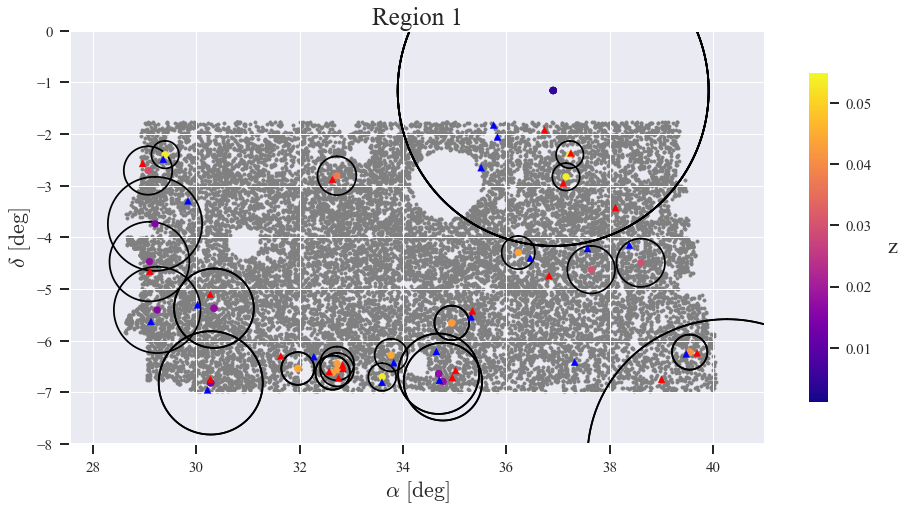

In [28]:
plot_region(1, xlim=[None, 41], ylim=[-8,0], ref_cat='nsa')

## Cluster 1.1
- Let's look at the candidates near the cluster at ($\alpha,\ \delta) \sim (37^\circ,\ -2^\circ$)

In [8]:
find_candy_near_point([37, -2], 1.7)

6 candidates found



## Cluster 1.2
- ($\alpha,\ \delta) \sim (32.5^\circ,\ -6.5^\circ$)

In [9]:
find_candy_near_point([32.5, -6.5], 1.)

6 candidates found



## Cluster 1.3
- ($\alpha,\ \delta) \sim (34.5^\circ,\ -6.5^\circ$)

In [10]:
find_candy_near_point([34.5, -6.5], 1)

6 candidates found



# Region 2
----

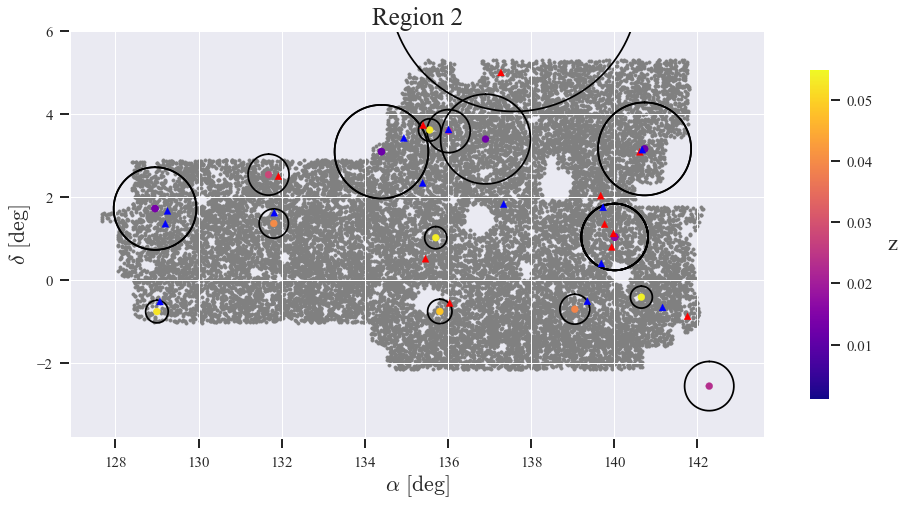

In [33]:
plot_region(2, ylim=[None, 6], ref_cat='nsa')

In [12]:
find_candy_near_point([129, 2.5], 1.5)

2 candidates found



## Cluster 2.1
- ($\alpha$, $\delta$) = (140$^\circ$, 1$^\circ$)

In [13]:
coord = (140, 1)
nsa_gal = nsa[nsa.query_radius(coord, 0.1)[0]]['z', 'nsaid']
print('nsa z =', nsa_gal['z'][0])
print('nsa id =', nsa_gal['nsaid'][0])
print()
find_candy_near_point(coord, 1.2)

nsa z = 0.0170264
nsa id = 12139

6 candidates found



# Region 3
---

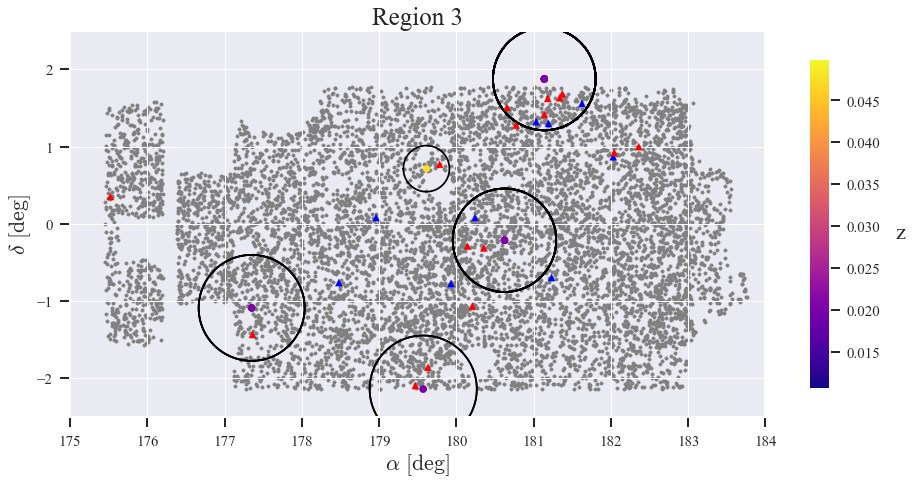

In [44]:
plot_region(3, xlim=[175, 184], ylim=[-2.5, 2.5], ref_cat='yang')

## Cluster 3.1
- ($\alpha,\ \delta) \sim (181^\circ,\ 1.5^\circ$)

In [15]:
find_candy_near_point([181, 1.5], 1.)

9 candidates found



## Cluster 3.2 
- $(\alpha,\ \delta) \sim (182.5^\circ,\ 1^\circ)$
- This group may be associated with 3.1

In [16]:
find_candy_near_point([182.5, 1], 0.5)

3 candidates found



## Cluster 3.3
- ($\alpha,\ \delta) \sim (180.5^\circ,\ -0.5^\circ$)

In [17]:
find_candy_near_point([180.5, -0.5], 1.)

6 candidates found



# Region 4
---

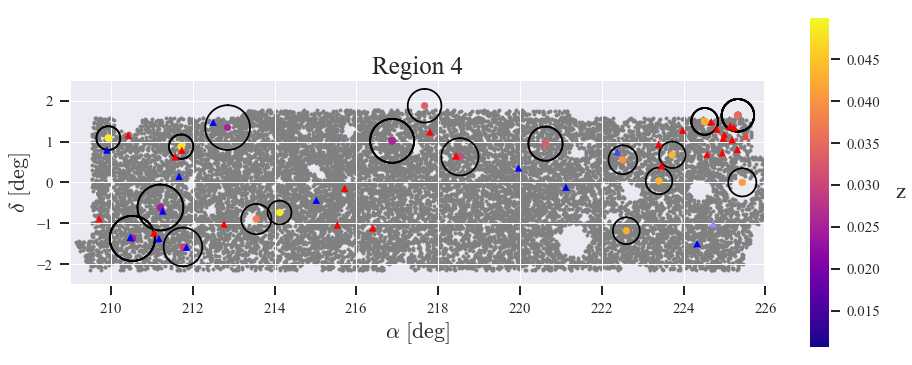

In [43]:
plot_region(4, xlim=[209, 226], ylim=[-2.5, 2.5], ref_cat='yang')

## Cluster 4.1
- ($\alpha,\ \delta) \sim (225^\circ,\ 1^\circ$)

In [19]:
find_candy_near_point([225, 1], 1.8)

14 candidates found



## Cluster 4.2
- ($\alpha,\ \delta) \sim (211^\circ,\ -1^\circ$)

In [20]:
find_candy_near_point([211, -1], 1.5)

7 candidates found



# Region 5
---

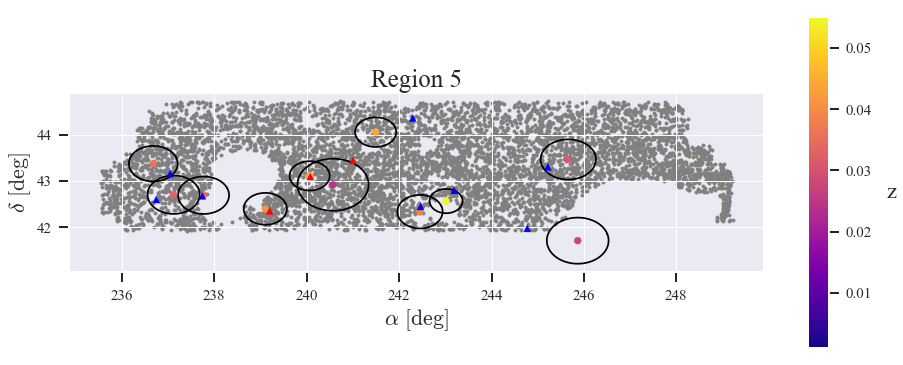

In [21]:
plot_region(5, ref_cat='nsa')

## Cluster 5.1
- $(\alpha,\ \delta) \sim (237^\circ,\ 42.5^\circ)$

In [22]:
find_candy_near_point([237, 42.5], 1)

3 candidates found



# Region 6
---

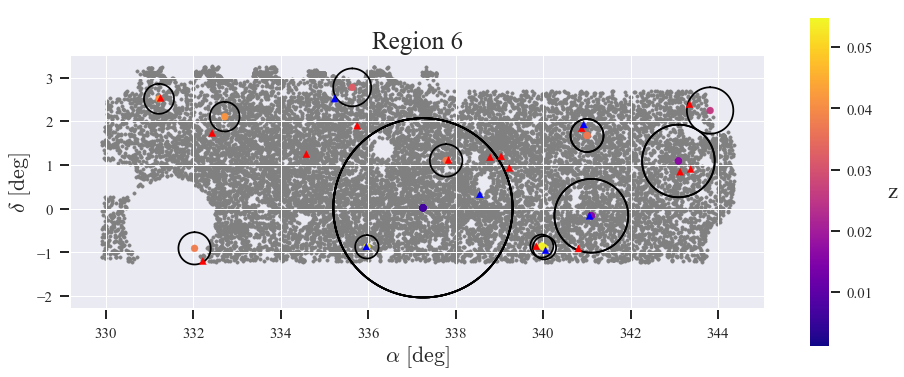

In [23]:
plot_region(6, ref_cat='nsa')

## Isolated red puffs?
near ($\alpha,\ \delta) \sim (335^\circ,\ 1.5^\circ$)

In [24]:
find_candy_near_point([335, 1.5], 1)

2 candidates found



near ($\alpha,\ \delta) \sim (339^\circ,\ 1^\circ$)

In [25]:
find_candy_near_point([339, 1.], 0.5)

3 candidates found

